In [ ]:
import vishack
import matplotlib.pyplot as plt
import numpy as np
import control
import kontrol


prefix = "../data/ham4/ham4_all_sensors_"
dates = ["20250203", "20250206", "20250209", "20250212", "20250215", "20250218", "20250221", "20250224", "20250227"]
suffix = ".xml"

data_list = []

for date in dates:
    filename = prefix + date + suffix
    data = vishack.data.diaggui.Diaggui(filename)
    data_list.append(data)

In [2]:
# data_list = [data1, data2, data3, data4, data5]
seis_channel = "L1:ISI-GND_STS_ITMY_Y_DQ"
l4c_channel = "L1:ISI-HAM4_FF_Y_IN1_DQ"
seis_list = []
res_list = []
log_seis_list = []
log_res_list = []

s = control.tf("s")
seis_cal = 1/s*1e-9

for data in data_list:
    f, seis = data.psd(seis_channel)
    f, coh = data.coh(seis_channel, l4c_channel)
    seis = seis[f>0]
    coh = coh[f>0]
    seis = seis * abs(seis_cal(1j*2*np.pi*f))
    res = (seis**2 * (1-coh**.5))**.5

    seis_list.append(seis)
    log_seis_list.append(np.log10(seis))
    res_list.append(res)
    log_res_list.append(np.log10(res))

seis_mean = 10**np.mean(log_seis_list, axis=0)
seis_std = np.std(log_seis_list, axis=0)
seis_sigma1 = 10**(np.log10(seis_mean) + seis_std)
seis_sigma2 = 10**(np.log10(seis_mean) + 2*seis_std)

res_mean = 10**np.mean(log_res_list, axis=0)
res_std = np.std(log_res_list, axis=0)
res_sigma1 = 10**(np.log10(res_mean) + res_std)
res_sigma2 = 10**(np.log10(res_mean) + 2*res_std)
res_sigma3 = 10**(np.log10(res_mean) + 3*res_std)

f = f[f>0]

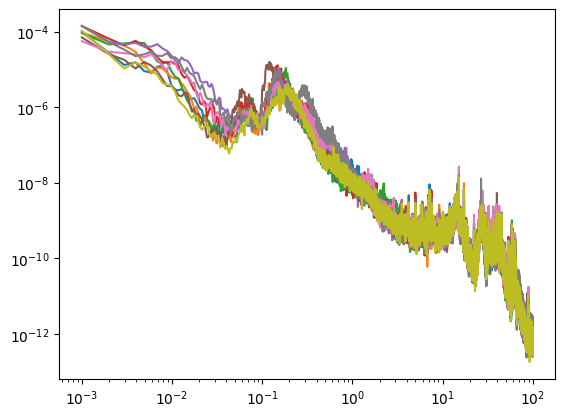

In [3]:
for seis in seis_list:
    plt.loglog(f, seis)

In [24]:
ratio = 0.0
golden_mean = (np.sqrt(5)-1.0)/2.0

fig_width_pt = 560# Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27 # Convert pt to inch
fig_ratio = ratio if ratio != 0.0 else golden_mean # Aesthetic ratio, unless specified through ratio
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean # height in inches
fig_size =  [fig_width,fig_height]

font_size = 14
# COLOR SCHEME

# LOAD PLOTTING OPTIONS
params = {
		'text.usetex': True,
		'font.family': 'serif',
		'font.size': font_size,
		'axes.labelsize': font_size,
		'legend.fontsize': font_size,
		'xtick.labelsize': font_size,
		'ytick.labelsize': font_size,
		# 'axes.grid' : True,
		'lines.markersize' : 14,
		'lines.linewidth' : 2,
		'axes.formatter.useoffset': False,
		'figure.figsize': fig_size
		}

plt.rcParams.update(params)

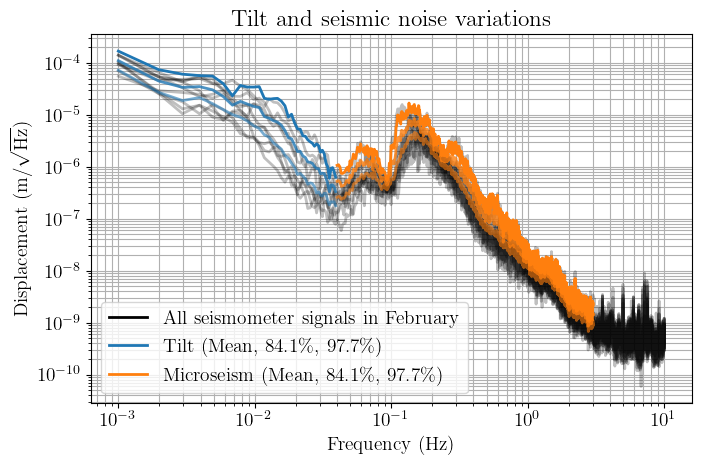

In [35]:
plt.title("Tilt and seismic noise variations")

for seis in seis_list:
    plt.loglog(f[f<10], seis[f<10], color="k", alpha=0.25)
    
plt.loglog(f[f<0.04], res_mean[f<0.04], color="C0", alpha=0.6)
plt.loglog(f[f<0.04], res_sigma1[f<0.04], color="C0", alpha=0.8)
plt.loglog(f[f<0.04], res_sigma2[f<0.04], color="C0", alpha=1)
plt.loglog(f[(f>0.04)*(f<3)], seis_mean[(f>0.04)*(f<3)], color="C1", alpha=0.6)
plt.loglog(f[(f>0.04)*(f<3)], seis_sigma1[(f>0.04)*(f<3)], color="C1", alpha=0.8)
plt.loglog(f[(f>0.04)*(f<3)], seis_sigma2[(f>0.04)*(f<3)], color="C1", alpha=1)

plt.loglog([], [], color="k", label="All seismometer signals in February")
plt.loglog([], [], color="C0", label="Tilt (Mean, 84.1\%, 97.7\%)")
plt.loglog([], [], color="C1", label="Microseism (Mean, 84.1\%, 97.7\%)")
# plt.loglog([], [], color="C1", label="All seismometer signals in February")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Displacement $(\mathrm{m}/\sqrt{\mathrm{Hz}})$")
plt.xlabel("Frequency (Hz)")

plt.savefig("tilt_and_seismic_noise.png", bbox_inches="tight", dpi=256)

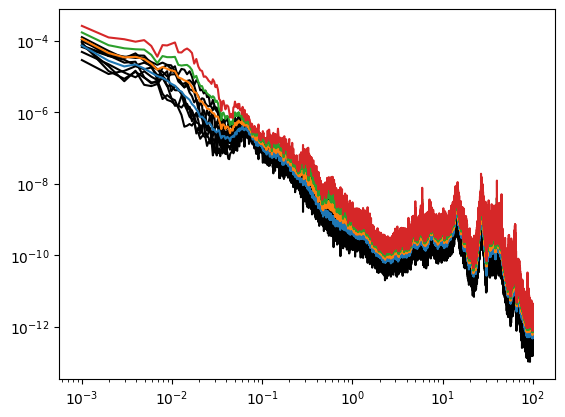

In [137]:
for res in res_list:
    plt.loglog(f, res, "k")
plt.loglog(f, res_mean)
plt.loglog(f, res_sigma1)
plt.loglog(f, res_sigma2)
plt.loglog(f, res_sigma3)

In [131]:
seis_mean[f<.043] = seis_mean[f>.043][0]
seis_mean_pad = seis_mean.copy()
seis_mean_pad[f>1] = seis_mean[f<1][-1]

seis_sigma1[f<.043] = seis_sigma1[f>.043][0]
seis_sigma1_pad = seis_sigma1.copy()
seis_sigma1_pad[f>1] = seis_sigma1[f<1][-1]

seis_sigma2[f<.043] = seis_sigma2[f>.043][0]
seis_sigma2_pad = seis_sigma2.copy()
seis_sigma2_pad[f>1] = seis_sigma2[f<1][-1]

res_mean_pad = res_mean.copy()
res_mean_pad[f<.003] = res_mean[f>.003][0]
res_mean_pad[f>1] = res_mean[f<1][-1]

res_sigma1_pad = res_sigma1.copy()
res_sigma1_pad[f<.003] = res_sigma1[f>.003][0]
res_sigma1_pad[f>1] = res_mean[f<1][-1]

res_sigma2_pad = res_sigma2.copy()
res_sigma2_pad[f<.003] = res_sigma2[f>.003][0]
res_sigma2_pad[f>1] = res_mean[f<1][-1]

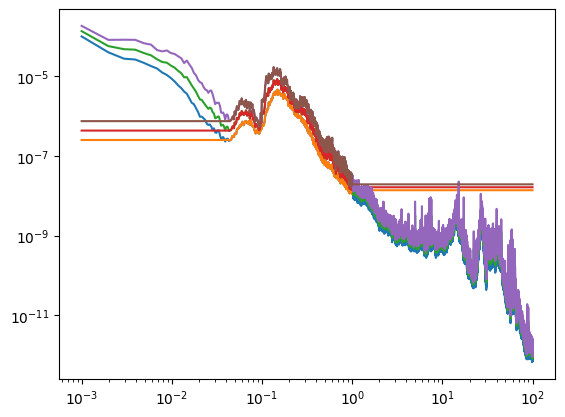

In [109]:
plt.loglog(f, seis_mean)
plt.loglog(f, seis_mean_pad)

plt.loglog(f, seis_sigma1)
plt.loglog(f, seis_sigma1_pad)

plt.loglog(f, seis_sigma2)
plt.loglog(f, seis_sigma2_pad)

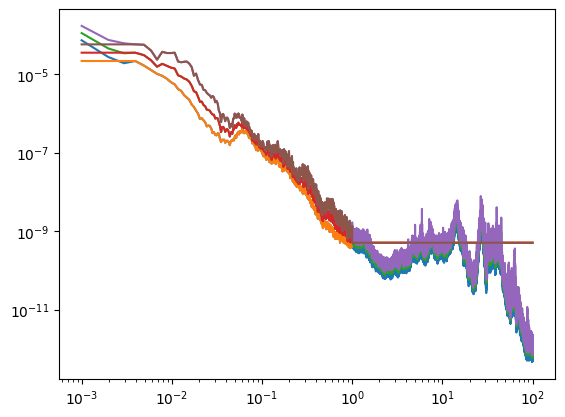

In [110]:
plt.loglog(f, res_mean)
plt.loglog(f, res_mean_pad)
plt.loglog(f, res_sigma1)
plt.loglog(f, res_sigma1_pad)
plt.loglog(f, res_sigma2)
plt.loglog(f, res_sigma2_pad)

In [48]:
seis_fit = kontrol.curvefit.spectrum_fit(f=f[f<10], spectrum=seis_mean_pad[f<10], nzero=5, npole=5)

In [95]:
seis_sigma1_fit = kontrol.curvefit.spectrum_fit(f=f[f<10], spectrum=seis_sigma1_pad[f<10], nzero=5, npole=5)

In [96]:
seis_sigma2_fit = kontrol.curvefit.spectrum_fit(f=f[f<10], spectrum=seis_sigma2_pad[f<10], nzero=5, npole=5)

In [111]:
res_fit = kontrol.curvefit.spectrum_fit(f=f[f<10], spectrum=res_mean_pad[f<10], nzero=4, npole=4, seed=1)

In [112]:
res_sigma1_fit = kontrol.curvefit.spectrum_fit(f=f[f<10], spectrum=res_sigma1_pad[f<10], nzero=4, npole=4)

In [113]:
res_sigma2_fit = kontrol.curvefit.spectrum_fit(f=f[f<10], spectrum=res_sigma2_pad[f<10], nzero=4, npole=4)

In [52]:
f_ = np.logspace(-4, 2, 1024)

In [53]:
def noise_model(f, na, nb, a, b):
    noise = ((na/f**a)**2+(nb/f**b)**2)**.5
    return noise
n_ade1_params = [1*10**-10.0625, 2e-10, 0.75, 0]
n_cps = noise_model(f, *n_ade1_params)

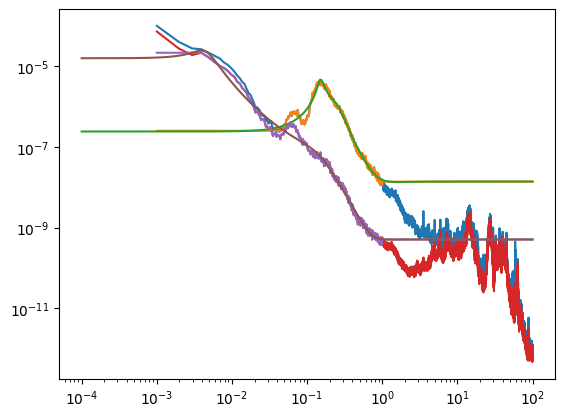

In [114]:
plt.loglog(f, seis_mean)
plt.loglog(f, seis_mean_pad)
plt.loglog(f_, abs(seis_fit(1j*2*np.pi*f_)))
plt.loglog(f, res_mean)
plt.loglog(f, res_mean_pad)
plt.loglog(f_, abs(res_fit(1j*2*np.pi*f_)))
# plt.loglog(f, n_cps)

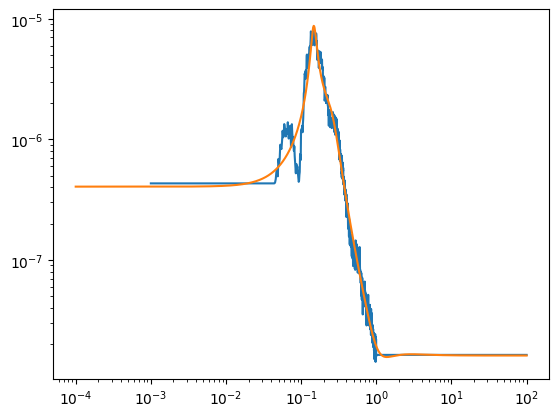

In [97]:
plt.loglog(f, seis_sigma1_pad)
plt.loglog(f_, abs(seis_sigma1_fit(1j*2*np.pi*f_)))

In [115]:
plt.loglog(f, seis_sigma1_pad)
plt.loglog(f_, abs(seis_sigma1_fit(1j*2*np.pi*f_)))res_fit

SyntaxError: invalid syntax (1331049991.py, line 2)

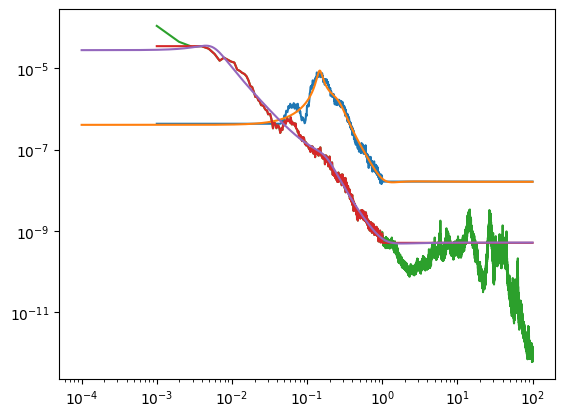

In [116]:
plt.loglog(f, seis_sigma1_pad)
plt.loglog(f_, abs(seis_sigma1_fit(1j*2*np.pi*f_)))

plt.loglog(f, res_sigma1)
plt.loglog(f, res_sigma1_pad)
plt.loglog(f_, abs(res_sigma1_fit(1j*2*np.pi*f_)))

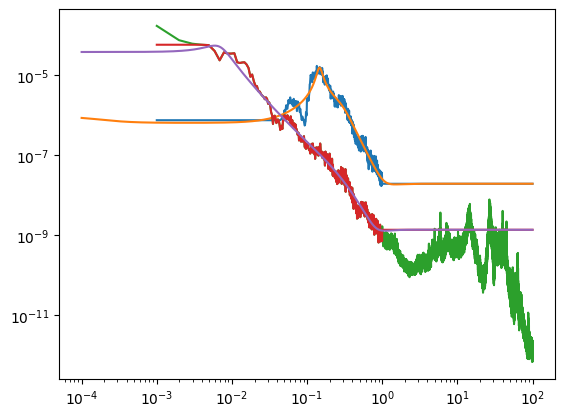

In [99]:
plt.loglog(f, seis_sigma2_pad)
plt.loglog(f_, abs(seis_sigma2_fit(1j*2*np.pi*f_)))

plt.loglog(f, res_sigma2)
plt.loglog(f, res_sigma2_pad)
plt.loglog(f_, abs(res_sigma2_fit(1j*2*np.pi*f_)))

In [117]:
comp = kontrol.ComplementaryFilter()
comp.noise1 = seis_fit
comp.noise2 = res_fit
comp.weight1 = 1/res_fit
comp.weight2 = 1/seis_fit
h1, h2 = comp.h2synthesis()
h1, h2 = comp.hinfsynthesis()

In [122]:
comp_sigma1 = kontrol.ComplementaryFilter()
comp_sigma1.noise1 = seis_fit
comp_sigma1.noise2 = res_sigma1_fit
comp_sigma1.weight1 = 1/res_sigma1_fit
comp_sigma1.weight2 = 1/seis_fit
h1_sigma1, h2_sigma1 = comp_sigma1.h2synthesis()
h1_sigma1, h2_sigma1 = comp_sigma1.hinfsynthesis()

In [123]:
comp_sigma2 = kontrol.ComplementaryFilter()
comp_sigma2.noise1 = seis_fit
comp_sigma2.noise2 = res_sigma2_fit
comp_sigma2.weight1 = 1/res_sigma2_fit
comp_sigma2.weight2 = 1/seis_fit
h1_sigma2, h2_sigma2 = comp_sigma2.h2synthesis()
h1_sigma2, h2_sigma2 = comp_sigma2.hinfsynthesis()

In [124]:
prefilt = (s/(s+2*np.pi*0.003))**3
h2p = h2*prefilt
h1p = 1-h2p

h2p_sigma1 = h2_sigma1*prefilt
h1p_sigma1 = 1-h2p_sigma1

h2p_sigma2 = h2_sigma2*prefilt
h1p_sigma2 = 1-h2p_sigma2

In [75]:
cml_bb_sc = kontrol.load_transfer_function("sensor_correction_filters/CML_BB_SC.pkl")

cml_bb_sc *= s

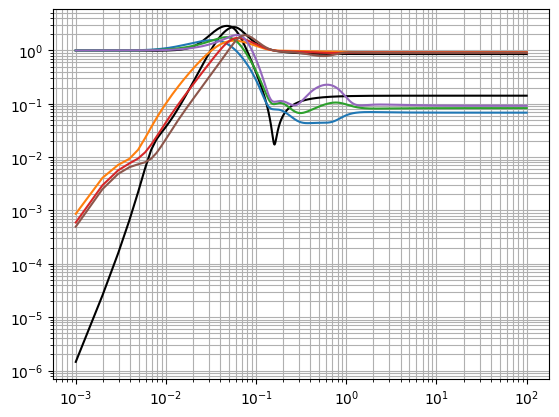

In [125]:
# plt.loglog(f, abs(h1(1j*2*np.pi*f)))
# plt.loglog(f, abs(2(1j*2*np.pi*f)))
plt.loglog(f, abs(cml_bb_sc(1j*2*np.pi*f)), "k")
plt.loglog(f, abs((1-cml_bb_sc)(1j*2*np.pi*f)), "k")

plt.loglog(f, abs(h1p(1j*2*np.pi*f)))
plt.loglog(f, abs(h2p(1j*2*np.pi*f)))

plt.loglog(f, abs(h1p_sigma1(1j*2*np.pi*f)))
plt.loglog(f, abs(h2p_sigma1(1j*2*np.pi*f)))

plt.loglog(f, abs(h1p_sigma2(1j*2*np.pi*f)))
plt.loglog(f, abs(h2p_sigma2(1j*2*np.pi*f)))

plt.grid(which="both")

In [94]:
h1p_sigma2

TransferFunction(array([2.86405495e+07, 7.49148842e+08, 9.90128942e+09, 8.68242670e+10,
       5.43170315e+11, 2.53100950e+12, 8.89496425e+12, 2.36597516e+13,
       4.85264791e+13, 7.77755188e+13, 9.72863263e+13, 9.47768470e+13,
       7.17820539e+13, 4.12119188e+13, 1.70261338e+13, 4.73849373e+12,
       8.14844171e+11, 7.50411398e+10, 2.81402807e+09, 4.47590074e+07,
       2.56838039e+05]), array([1.18036170e+08, 3.14046606e+09, 4.32054958e+10, 3.88361860e+11,
       2.47629142e+12, 1.16177417e+13, 4.05437985e+13, 1.05146609e+14,
       2.02167082e+14, 2.88274885e+14, 3.05883625e+14, 2.42897872e+14,
       1.45128109e+14, 6.52406278e+13, 2.17942317e+13, 5.22362975e+12,
       8.32660293e+11, 7.56421384e+10, 2.81402807e+09, 4.47590074e+07,
       2.56838039e+05]))

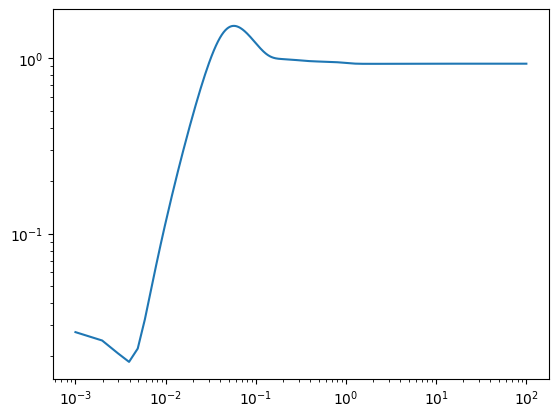

In [126]:
plt.loglog(f, abs(h2(1j*2*np.pi*f)))

In [129]:
#export

h2 = kontrol.TransferFunction(h2)
h2.save("sensor_correction_filters/ham4/h_sc_mean.pkl")

h2_sigma1 = kontrol.TransferFunction(h2_sigma1)
h2_sigma1.save("sensor_correction_filters/ham4/h_sc_sigma1.pkl")

h2_sigma2 = kontrol.TransferFunction(h2_sigma2)
h2_sigma2.save("sensor_correction_filters/ham4/h_sc_sigma2.pkl")

h_sc_prefilt = kontrol.TransferFunction(prefilt)
h_sc_prefilt.save("sensor_correction_filters/ham4/prefilt.pkl")

In [132]:
#export noise spectrums
np.savez("noise_spectrums/ham4/seismometer_mean.npz", f=f, data=res_mean)
np.savez("noise_spectrums/ham4/seismometer_sigma1.npz", f=f, data=res_sigma1)
np.savez("noise_spectrums/ham4/seismometer_sigma2.npz", f=f, data=res_sigma2)

np.savez("noise_spectrums/ham4/seismic_mean.npz", f=f, data=seis_mean)
np.savez("noise_spectrums/ham4/seismic_sigma1.npz", f=f, data=seis_sigma1)
np.savez("noise_spectrums/ham4/seismic_sigma2.npz", f=f, data=seis_sigma2)